<a href="https://colab.research.google.com/github/Dhatri-4/CODSOFT_JULY/blob/Machine-learning/TASK2_CODSOFT_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Detection

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
sns.set(rc = {'figure.figsize':(15,8)})

In [55]:
import pandas as pd

# Try reading the file, handling potential errors
try:
    df = pd.read_csv('/content/fraudTest.csv')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Optionally, print the problematic line
    with open('/content/fraudTest.csv', 'r') as file:
        for i, line in enumerate(file):
            if i == 7786:  # Line numbers are zero-based
                print(line)
                break

df.isna().sum()

Error reading CSV: Error tokenizing data. C error: Expected 23 fields in line 7787, saw 29

15581,2020-06-26 18:06:10,4259996134423,fraud_Medhurst Inc,home,47.27,Julie,Johnson,F,9331 Robert Passage Suite 327,Hudson,KS,67545,38.1485,-98.6408,215,Probation officer,1968-11-22,5dc93468b6f9ee1c609964b3a2a6f27c,1372269970,37.511258000000005108.3961,192,Further education lecturer,1964-01-04,e8e13beeb44a587636b1eb9e48faaab5,1371907613,47.94505,-107.63058999999998,0



,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,1
amt,1
first,1
last,1
gender,1
street,1


In [56]:
#Transaction amount statistics
df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,205673.000000,205673,2.056730e+05,205672.000000,205672.000000,205672.000000,2.056720e+05,2.056710e+05,205671.000000,205671.000000,205671.000000
mean,99246.236988,2020-07-25 23:15:07.160137728,4.198296e+17,69.276035,48803.864065,38.544074,9.510393e+04,1.374794e+09,38.542490,-90.211423,0.004298
min,0.000000,2020-06-21 12:14:25,6.041621e+10,1.000000,1257.000000,20.027100,2.300000e+01,1.371817e+09,19.039532,-166.671575,0.000000
25%,47534.000000,2020-07-07 10:37:18,1.800429e+14,9.660000,26237.000000,34.690200,7.410000e+02,1.373193e+09,34.758114,-96.873822,0.000000
50%,98952.000000,2020-07-26 04:02:51,3.520550e+15,47.410000,48174.000000,39.371600,2.408000e+03,1.374811e+09,39.378512,-87.416081,0.000000
75%,150370.000000,2020-08-12 13:28:21,4.634956e+15,83.080000,72011.000000,41.940400,2.032800e+04,1.376314e+09,41.961610,-80.250163,0.000000
max,201788.000000,2020-08-31 09:22:08,4.992346e+18,13149.150000,99783.000000,65.689900,1.372113e+09,1.377941e+09,66.669356,-66.952352,1.000000
std,58908.880996,NaN,1.312621e+18,146.230720,26854.662957,5.072449,3.040204e+06,1.794660e+06,5.108618,13.742209,0.065419


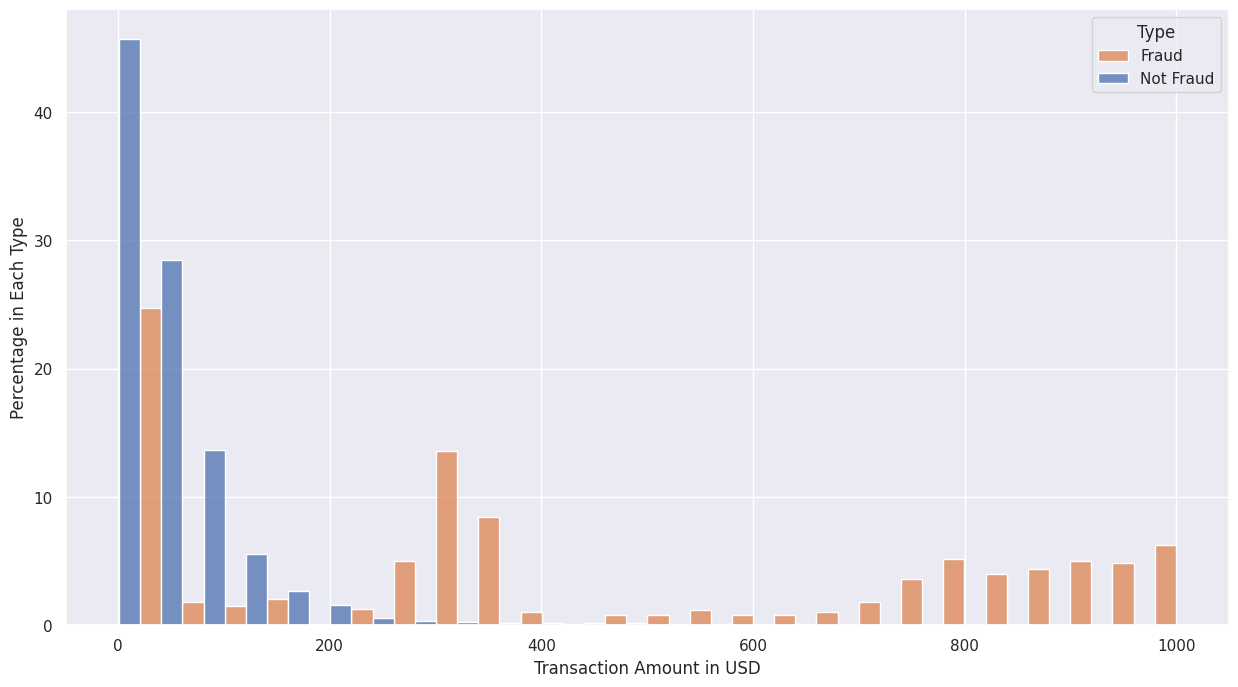

In [57]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

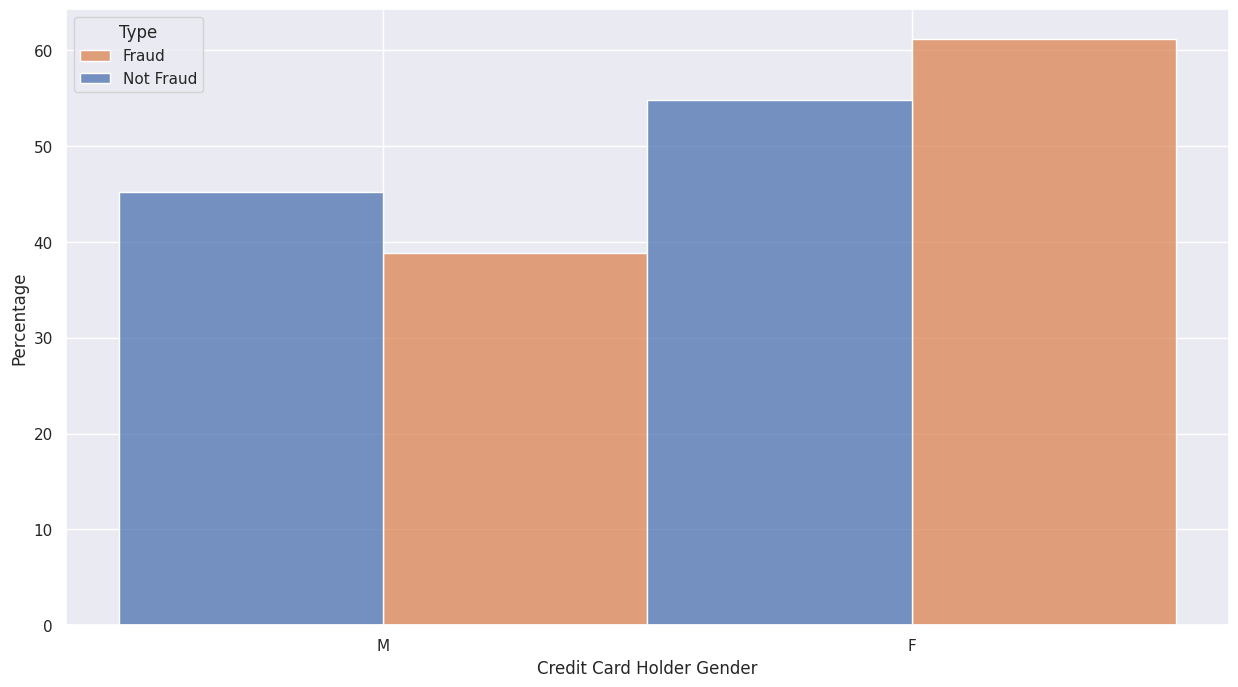

In [58]:
#Relation between Gender and Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

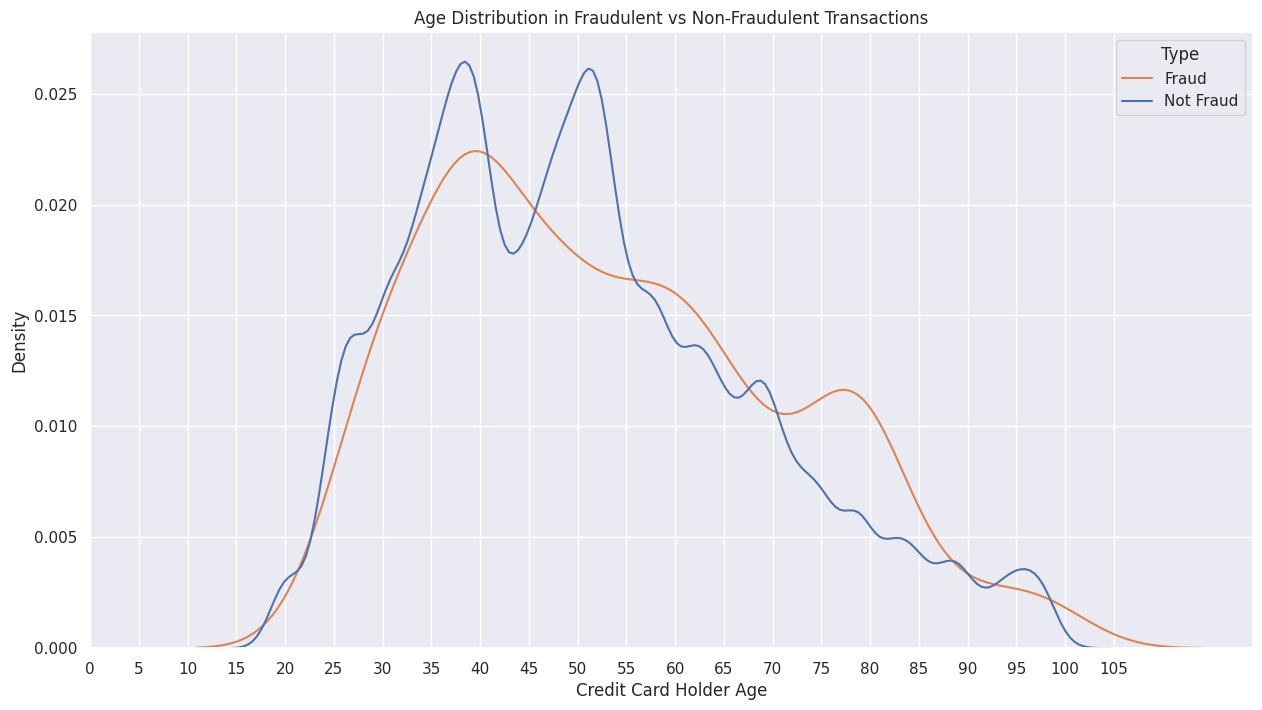

In [63]:
#Relation between age vs fraud
import datetime as dt
# Handle non-date values in 'dob' column
df['age'] = df['dob'].apply(lambda x: dt.date.today().year - pd.to_datetime(x, errors='coerce').year if pd.notna(x) else None)
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [61]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [64]:
#Relation between age vs fraud
import datetime as dt
import pandas as pd

# Handle non-date values in 'dob' column
df['age'] = df['dob'].apply(lambda x: dt.date.today().year - pd.to_datetime(x, errors='coerce').year if pd.notna(x) else None)

#Feature Encoding
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
#one-hot encoding the age variable
age_onehot = pd.get_dummies(df.age, prefix='age', drop_first=True)

In [65]:
df1 = pd.concat([df, category_onehot,gender_onehot,age_onehot], axis=1)

df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,age_90.0,age_91.0,age_92.0,age_93.0,age_94.0,age_95.0,age_96.0,age_97.0,age_98.0,age_100.0
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,False,False,False,False,False,False,False,False,False,False
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,False,False,False,False,False,False,False,False,False,False
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,False,False,False,False,False,False,False,False,False,False
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,False,False,False,False,False,False,False,False,False,False
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,False,False,False,False,False,False,False,False,False,False


In [66]:
#subset the training data to include only the features that we need
train=df[['category','amt','gender','age','is_fraud']]

In [67]:
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [76]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check for and handle NaN values in y_train
print("Number of NaN values in y_train:", np.isnan(y_train).sum())

# Option 1: Remove rows with NaN in y_train (if appropriate for your data)
valid_indices = ~np.isnan(y_train)
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Option 2: Impute NaN values with a suitable strategy (e.g., mean, median, mode)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')  # Replace 'most_frequent' with your desired strategy
# y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed

model=LogisticRegression()
model.fit(X_train_resampled, y_train_resampled) # Fit the model on the training set
predicted=model.predict(X_test_resampled) # Predict on the test set
print('Classification report:\n', classification_report(y_test_resampled, predicted))
conf_mat = confusion_matrix(y_true=y_test_resampled, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test_resampled.sum()/len(y_test_resampled),4))

Number of NaN values in y_train: 0
Classification report:
               precision    recall  f1-score   support

         0.0       0.77      0.91      0.83     40243
         1.0       0.89      0.73      0.80     40126

    accuracy                           0.82     80369
   macro avg       0.83      0.82      0.82     80369
weighted avg       0.83      0.82      0.82     80369

Confusion matrix:
 [[36463  3780]
 [10758 29368]]
Share of Non-Fraud in Test Data: 0.5006999999999999


In [78]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test_resampled) # Use X_test_resampled here
print('Classification report:\n', classification_report(y_test_resampled, predicted)) # Use y_test_resampled
conf_mat = confusion_matrix(y_true=y_test_resampled, y_pred=predicted) # Use y_test_resampled
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test_resampled.sum()/len(y_test_resampled),4)) # Use y_test_resampled

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     40243
         1.0       1.00      1.00      1.00     40126

    accuracy                           1.00     80369
   macro avg       1.00      1.00      1.00     80369
weighted avg       1.00      1.00      1.00     80369

Confusion matrix:
 [[40243     0]
 [    1 40125]]
Share of Non-Fraud in Test Data: 0.5006999999999999
